## Training Regression Models for the Dataset

Importing needed libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df=pd.read_csv('Alg_forest.csv',header=1)

In [79]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Checking null values

In [80]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

Viewing the null values

In [81]:
df[df.isna().any(axis=True)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [82]:
df=df.dropna().reset_index(drop=True)

In [83]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [84]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [85]:
df=df.drop(122).reset_index(drop=True)

In [45]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [86]:
df.loc[:122,'Area']=1
df.loc[122:,'Area']=0


In [87]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Area
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [88]:
df_cat=[features for features in df.columns if df[features].dtype=='O']

In [52]:
df_cat

['day',
 'month',
 'year',
 'Temperature',
 ' RH',
 ' Ws',
 'Rain ',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes  ']

In [89]:
for i in df_cat:
    if i !='Classes  ':
         df[i]=df[i].astype(float)
        
   

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Area         243 non-null    float64
dtypes: float64(14), object(1)
memory usage: 28.6+ KB


In [91]:
df['Classes  ']=np.where(df['Classes  '].str.contains("not fire"),0,1)

In [92]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Area
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0


In [103]:
x=df.drop(['FWI','day','month','year'],axis=1)

In [94]:
y=df['FWI']

In [104]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Area
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,1.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,1.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,1.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,1.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
238,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,1,0.0
239,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0,0.0
240,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0,0.0
241,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0,0.0


<AxesSubplot: >

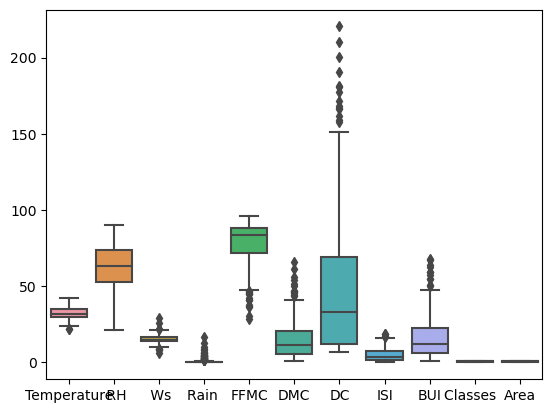

In [105]:
sns.boxplot(x)

Scaling the datasset

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=43)

In [143]:
scaler=StandardScaler()

In [144]:
scaler.fit(x_train)

StandardScaler()

In [145]:
x_train_transformed=scaler.transform(x_train)

In [146]:
x_test_transformed=scaler.transform(x_test)

<AxesSubplot: >

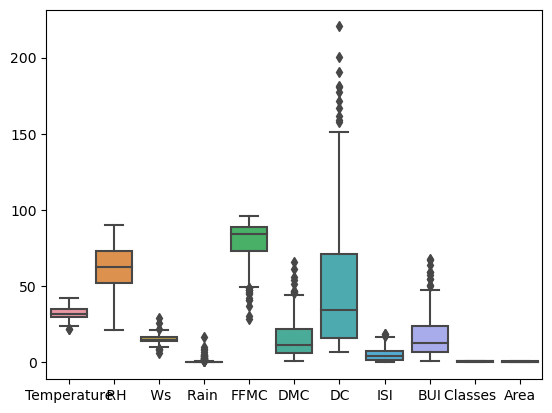

In [147]:
sns.boxplot(x_train)



<AxesSubplot: >

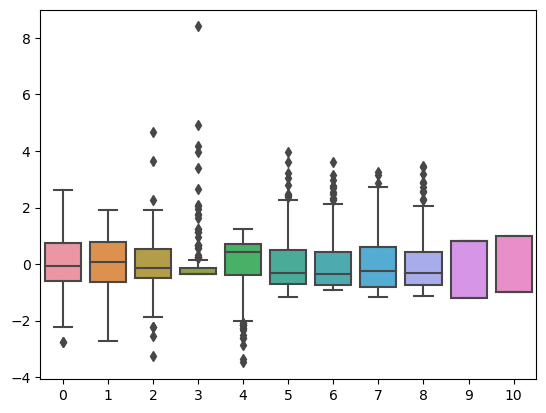

In [148]:
sns.boxplot(x_train_transformed)

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_transformed,y_train)
y_pred=linreg.predict(x_test_transformed)

mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print(mae,r2_score)

0.5586675030041618 0.9822694107042257


Text(0.5, 1.0, 'Ytest vs y pred')

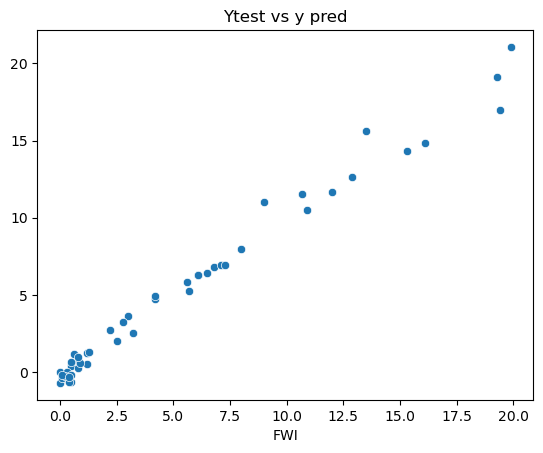

In [169]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Ytest vs y pred')

In [170]:
from sklearn.linear_model import Lasso


In [171]:
regressor=Lasso()

In [172]:
regressor.fit(x_train_transformed,y_train)

Lasso()

In [174]:
y_pred=regressor.predict(x_test_transformed)

In [177]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print(mae,r2_score)

0.983385083698476 0.9518398945758019


Text(0.5, 1.0, 'Ytest vs y pred')

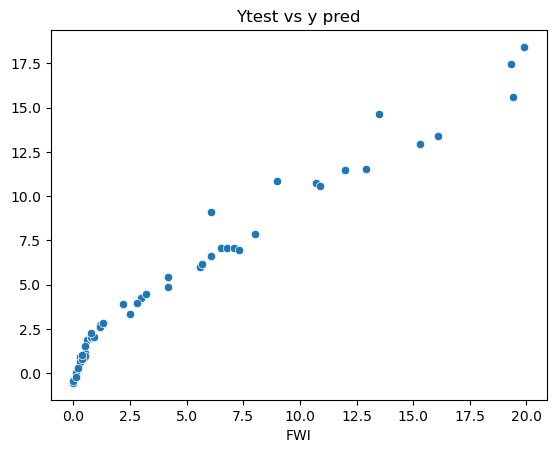

In [178]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Ytest vs y pred')

In [179]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()

In [181]:
ridge.fit(x_train_transformed,y_train)
y_pred=ridge.predict(x_test_transformed)

mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print(mae,r2_score)

0.5939864651978519 0.9791592995979417


Text(0.5, 1.0, 'Ytest vs y pred')

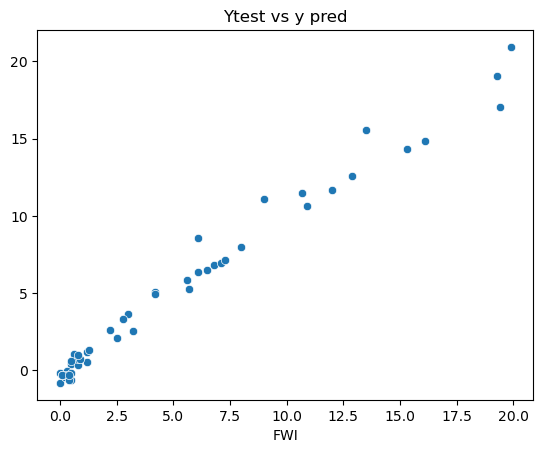

In [182]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Ytest vs y pred')

In [183]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()

In [185]:
elastic.fit(x_train_transformed,y_train)

ElasticNet()

In [186]:
y_pred=elastic.predict(x_test_transformed)

Text(0.5, 1.0, 'Ytest vs y pred')

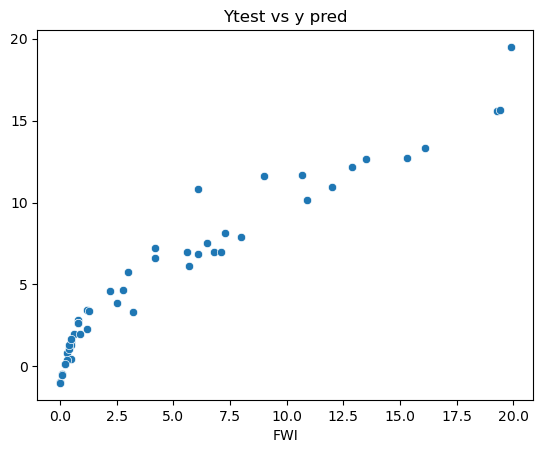

In [187]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Ytest vs y pred')

In [188]:
mae=mean_absolute_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print(mae,r2_score)

1.3413497521896622 0.910701501532228
